In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import math

In [2]:


# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

In [3]:
message_count = data.groupby('user').size().reset_index(name='message_count')
message_count = message_count.sort_values(by='message_count', ascending=False)

message_count.describe()

,message_count
count,47556.000000
mean,26.147784
std,419.380054
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,40356.000000


In [4]:
message_count.head(50)

,user,message_count
7018,Martin_Gales,40356
5416,JBIN2036,31319
14736,balintboss,24807
10084,StreamElements,24356
20281,elluiti,23275
207,1206paul_,20401
41122,stan_iv4,18108
27899,klimzaa,17757
24778,ifanbenmezda,17233
10832,Typhu25,16114


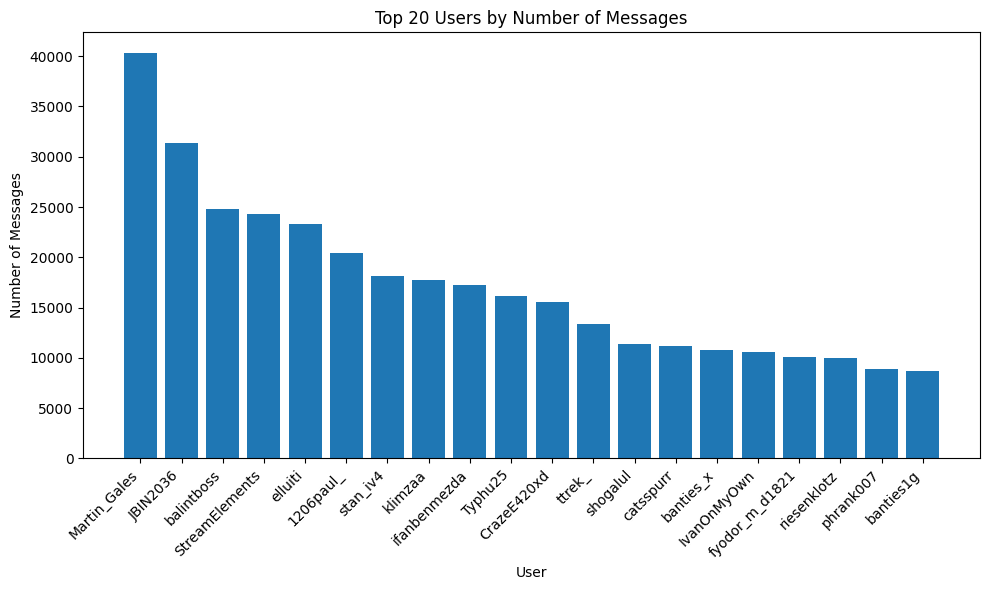

In [5]:
# Select the top 20 users by message count
top_users = message_count.head(20)

plt.figure(figsize=(10,6))
plt.bar(top_users['user'], top_users['message_count'])

# Adding labels and title
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.title('Top 20 Users by Number of Messages')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



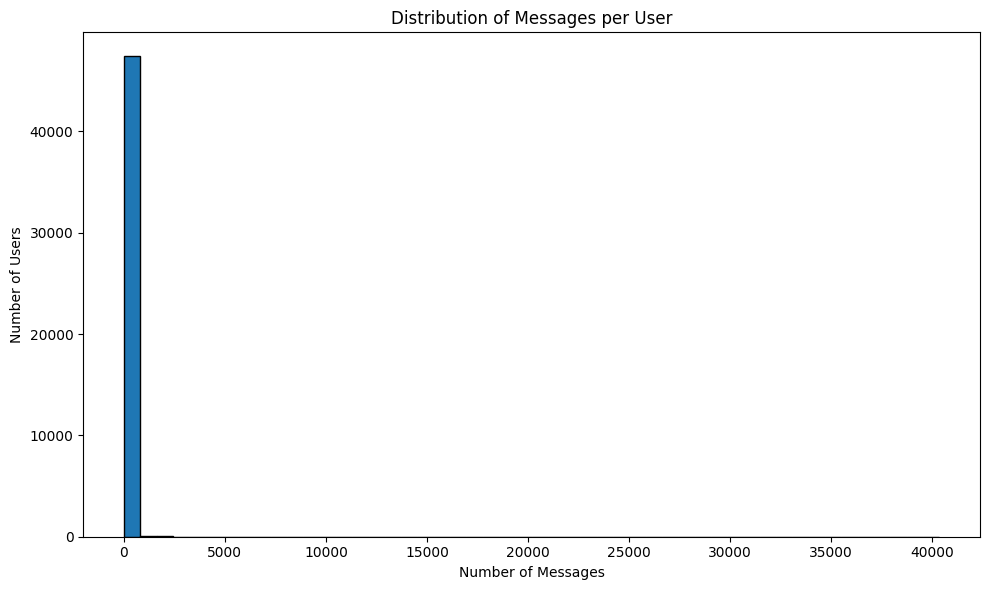

In [6]:
plt.figure(figsize=(10,6))
plt.hist(message_count['message_count'], bins=50, edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Messages')
plt.ylabel('Number of Users')
plt.title('Distribution of Messages per User')

plt.tight_layout()
plt.show()


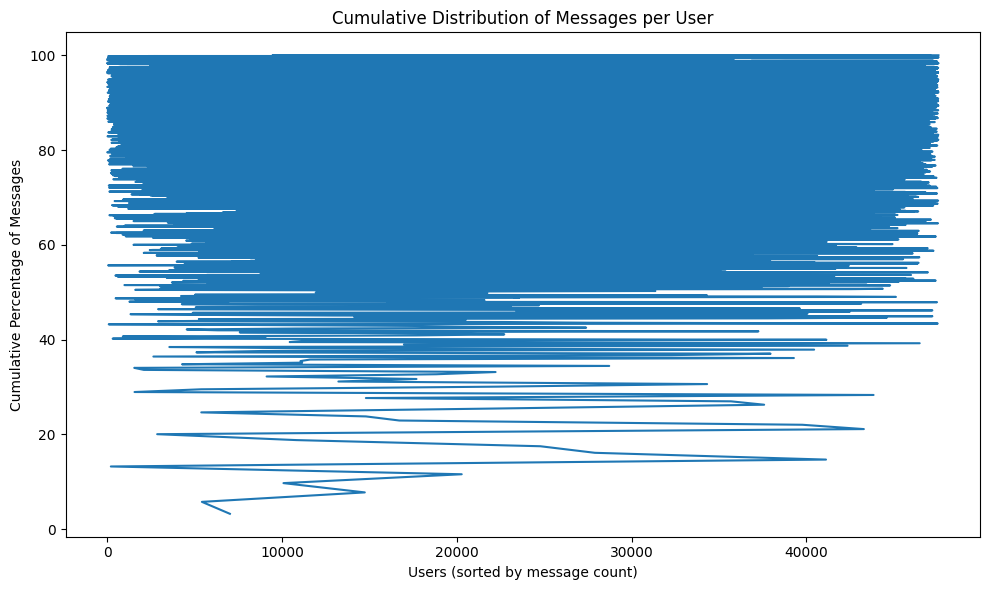

In [7]:
# Sort users by message count
sorted_message_counts = message_count['message_count'].sort_values(ascending=False)

# Compute cumulative percentage
cumulative_percentage = np.cumsum(sorted_message_counts) / sorted_message_counts.sum() * 100

# Plot cumulative distribution
plt.figure(figsize=(10,6))
plt.plot(cumulative_percentage)

# Adding labels and title
plt.xlabel('Users (sorted by message count)')
plt.ylabel('Cumulative Percentage of Messages')
plt.title('Cumulative Distribution of Messages per User')

plt.tight_layout()
plt.show()


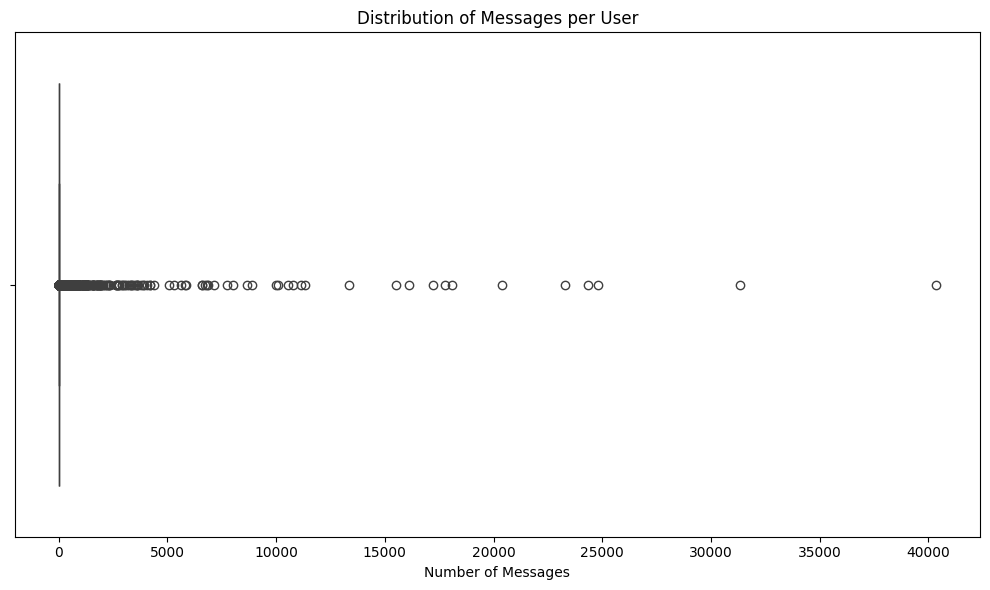

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=message_count['message_count'])

# Adding labels and title
plt.xlabel('Number of Messages')
plt.title('Distribution of Messages per User')

plt.tight_layout()
plt.show()


In [9]:
stream_max = data['stream'].max()+1
ten_p_stream = stream_max /100*33
ten_p_stream = math.floor(ten_p_stream)
ten_p_stream

85

In [10]:
# Step 1: Group by user and calculate the number of messages per user
message_count = data.groupby('user').size().reset_index(name='message_count')

# Step 2: Group by user and calculate the number of unique streams each user has participated in
unique_stream_count = data.groupby('user')['stream'].nunique().reset_index(name='unique_stream_count')

# Step 3: Merge both DataFrames on 'user'
user_stats = pd.merge(message_count, unique_stream_count, on='user')


# Step 4: Filter users who either sent more than 50 messages or participated in at least 3 different streams
filtered_data = user_stats[(user_stats['message_count'] > 100) & (user_stats['unique_stream_count'] > ten_p_stream)]

# Step 5: Filter original DataFrame to only include rows from filtered users
filtered_users = filtered_data['user']
filtered_message_count = message_count[message_count['user'].isin(filtered_users)]

# Result: 'filtered_data' now contains the rows from users who meet the conditions


In [11]:
top_users['message_count'].describe()

count       20.000000
mean     17206.400000
std       8308.322805
min       8677.000000
25%      10724.500000
50%      15814.000000
75%      21119.500000
max      40356.000000
Name: message_count, dtype: float64

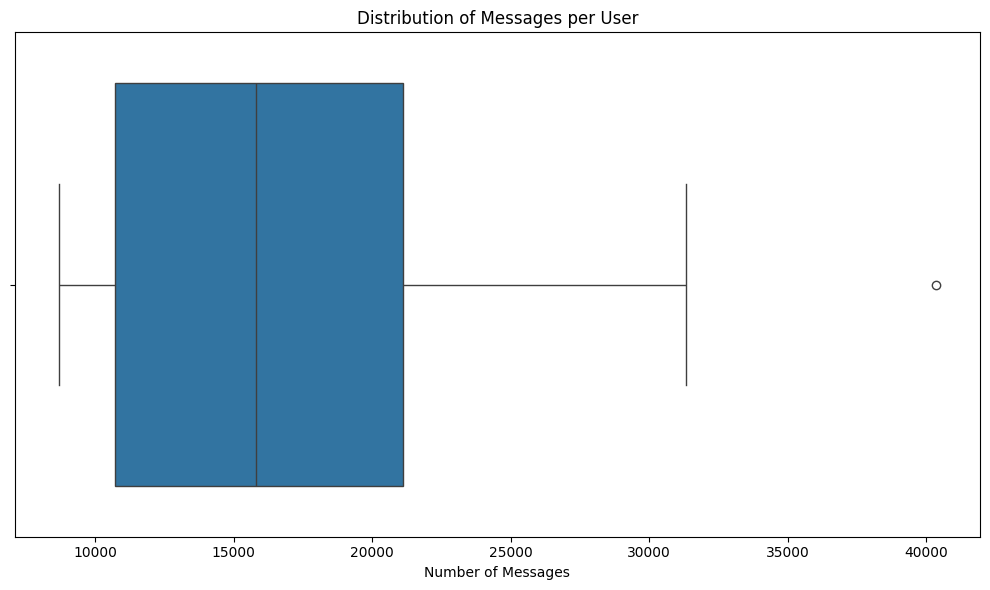

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x=top_users['message_count'])

# Adding labels and title
plt.xlabel('Number of Messages')
plt.title('Distribution of Messages per User')

plt.tight_layout()
plt.show()

In [13]:
#data[data['user']=='NSAPartyVan']

In [14]:
boss = data[data['user']=='balintboss']
boss.tail(50)

,date,user,message,stream
373843,2024-09-20 14:55:57+00:00,balintboss,trizzeSniffa,116
374003,2024-09-20 15:01:20+00:00,balintboss,WW raid,116
374065,2024-09-20 15:03:07+00:00,balintboss,AlienPls,116
374081,2024-09-20 15:03:42+00:00,balintboss,do the ludy,116
374136,2024-09-20 15:05:37+00:00,balintboss,and the 9k on youtube Clap,116
374151,2024-09-20 15:06:06+00:00,balintboss,yes,116
374174,2024-09-20 15:07:01+00:00,balintboss,that hairclip lived a long life o7,116
374193,2024-09-20 15:07:48+00:00,balintboss,"@klimzaa I made that, today BUSSIN",116
374220,2024-09-20 15:09:09+00:00,balintboss,freakbob yes,116
374282,2024-09-20 15:12:48+00:00,balintboss,HEHE,116


In [13]:
convert =  data[data['message'].str.contains(' converted from ', case=False, na=False)]
convert


,date,user,message,stream
23495,2024-05-10 19:15:33+00:00,bilaltothefuture,bilaltothefuture converted from a Prime sub to...,8
124662,2024-06-16 14:03:41+00:00,phmy1,phmy1 converted from a Prime sub to a Tier 1 s...,43
340544,2024-09-11 12:24:09+00:00,Deimoss02,Deimoss02 converted from a Prime sub to a Tier...,110
378442,2024-09-20 17:48:08+00:00,balintboss,balintboss converted from a Prime sub to a Tie...,116
469198,2024-10-19 12:35:05+00:00,thewowoz,thewowoz converted from a Prime sub to a Tier ...,140
506411,2024-10-28 18:36:09+00:00,kingoxxl,kingoxxl converted from a Prime sub to a Tier ...,148
570634,2024-11-10 13:22:24+00:00,chrizzlybaer31,chrizzlybaer31 converted from a Prime sub to a...,159
767025,2024-12-26 14:51:39+00:00,HippoBippo_,HippoBippo_ converted from a Prime sub to a Ti...,197
1083984,2025-02-18 15:58:26+00:00,pat0091,pat0091 converted from a Prime sub to a Tier 1...,244
1099918,2025-02-19 19:32:52+00:00,gordoniio,gordoniio converted from a Prime sub to a Tier...,245


In [17]:
dime =  data[(data['user']=="Deimoss02")]
dime

,date,user,message,stream
189040,2024-07-17 13:48:29+00:00,Deimoss02,Deimoss02 subscribed with Prime.,66
189046,2024-07-17 13:48:59+00:00,Deimoss02,s,66
189073,2024-07-17 13:53:25+00:00,Deimoss02,b,66
189076,2024-07-17 13:54:35+00:00,Deimoss02,is it your first time in pubg?,66
189082,2024-07-17 13:55:45+00:00,Deimoss02,that backpack is protects you from zone,66
189107,2024-07-17 13:59:45+00:00,Deimoss02,shroud is the best ever,66
189109,2024-07-17 14:00:25+00:00,Deimoss02,you cant,66
189112,2024-07-17 14:01:19+00:00,Deimoss02,!steam,66
198185,2024-07-22 12:51:38+00:00,Deimoss02,!steam,70
198212,2024-07-22 12:53:02+00:00,Deimoss02,whats your steam profile name ? @dorozea,70
